In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
df=sns.load_dataset('iris')
X=df.drop(['species'],axis=1)
y=df['species']
tr_x,tt_x,tr_y,tt_y=train_test_split(X,y,test_size=0.3)
tr_x.shape,tt_x.shape,tr_y.shape,tt_y.shape

((105, 4), (45, 4), (105,), (45,))

In [ ]:
from sklearn.ensemble import VotingRegressor,VotingClassifier,BaggingClassifier,BaggingRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor

In [ ]:
m1=LogisticRegression()
m2=KNeighborsClassifier()
m3=DecisionTreeClassifier()
m4=SVC()

In [ ]:
e_m=VotingClassifier([('Lm',m1),('Km',m2),('Dm',m3),('SVm',m4)])

In [ ]:
e_m=VotingClassifier([('Lm',m1),('Km',m2),('Dm',m3),('SVm',m4)])
cross_val_score(e_m,tr_x,tr_y).mean()

0.9523809523809523

In [ ]:
p={}
p['LogisticRegression()']={}
p['KNeighborsClassifier()']={}
p['DecisionTreeClassifier()']={}
p['SVC()']={}
p['LogisticRegression()']['C']=[1,2,3,4,5,6,7,8,9]
p['KNeighborsClassifier()']['n_neighbors']=[1,2,3,4,5,6,7,8,9]
p['DecisionTreeClassifier()']['max_depth']=[1,2,3,4,5]
p['SVC()']['C']=[1,2,3,4,5,6,7,8,9]

In [ ]:
p

{'LogisticRegression()': {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
 'KNeighborsClassifier()': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
 'DecisionTreeClassifier()': {'max_depth': [1, 2, 3, 4, 5]},
 'SVC()': {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]}}

In [ ]:
e_p={
    'Lm__C':[1,2,3,4,5,6,7,8,9],
    'Km__n_neighbors':[1,2,3,4,5,6,7,8,9],
    'Dm__max_depth':[1,2,3,4,5],
    'SVm__C':[1,2,3,4,5,6,7,8,9]
}

In [ ]:
gs=GridSearchCV(e_m,e_p)
gs.fit(tr_x,tr_y)

In [ ]:
gs.best_params_

{'Dm__max_depth': 1, 'Km__n_neighbors': 7, 'Lm__C': 1, 'SVm__C': 4}

In [ ]:
gs.best_score_

0.9619047619047618

In [ ]:
gs.best_estimator_

VotingClassifier(estimators=[('Lm', LogisticRegression(C=1)),
                             ('Km', KNeighborsClassifier(n_neighbors=7)),
                             ('Dm', DecisionTreeClassifier(max_depth=1)),
                             ('SVm', SVC(C=4))])

In [ ]:
gs.best_params_

{'Dm__max_depth': 1, 'Km__n_neighbors': 7, 'Lm__C': 1, 'SVm__C': 4}

In [ ]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [ ]:
rf=RandomForestClassifier(10000)
#rf.fit(tr_x,tr_y)

In [ ]:
cross_val_score(rf,tr_x,tr_y).mean()

0.9333333333333332

In [ ]:
m=LogisticRegression()
bg=BaggingClassifier(m,10)
cross_val_score(bg,tr_x,tr_y)

In [ ]:
BaggingClassifier(m,10)

BaggingClassifier(estimator=LogisticRegression())

In [ ]:
b_p={'estimator__C':[1,2,3,4,5]}

In [ ]:
gs=GridSearchCV(bg,b_p)
gs.fit(tr_x,tr_y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=np.load('fruits_300.npy')
X.shape
plt.imshow(X[200],cmap='gray_r')
plt.axis('off')
plt.show()

In [ ]:
a=X[:100]
p=X[100:200]
b=X[200:]

In [ ]:
a_v=a.reshape(-1,100*100)
p_v=p.reshape(-1,100*100)
b_v=b.reshape(-1,100*100)

In [ ]:
# 사과의 평균 이미지
m_a_im=a_v.mean(axis=0)
m_p_im=p_v.mean(axis=0)
m_b_im=b_v.mean(axis=0)

In [ ]:
# 사진 별 평균값
im_m_a=a_v.mean(axis=1)
im_m_p=p_v.mean(axis=1)
im_m_b=b_v.mean(axis=1)

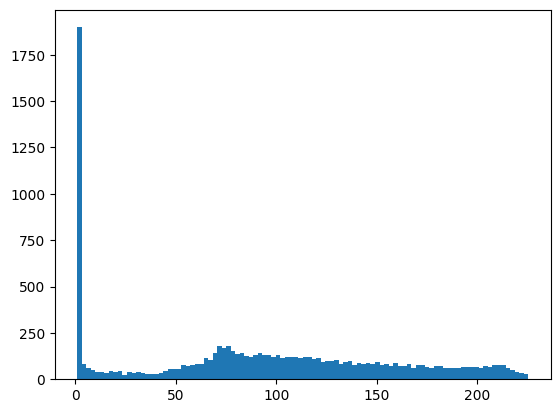

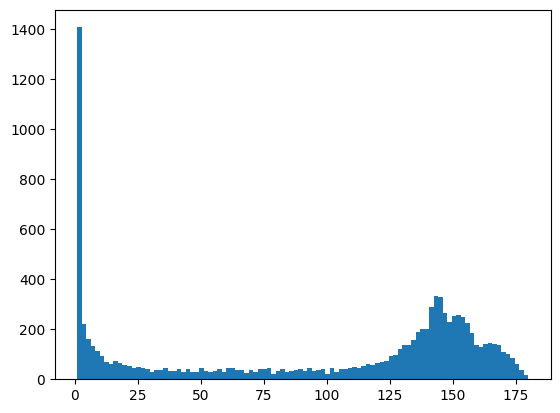

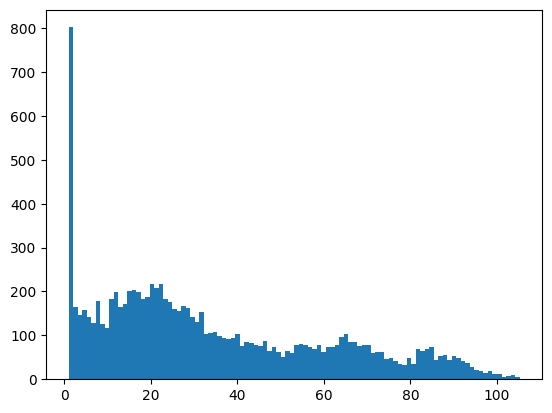

In [ ]:
plt.hist(m_a_im,bins=100)
plt.show()
plt.hist(m_p_im,bins=100)
plt.show()
plt.hist(m_b_im,bins=100)
plt.show()

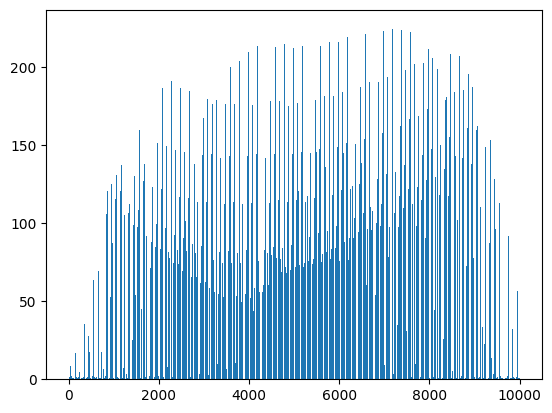

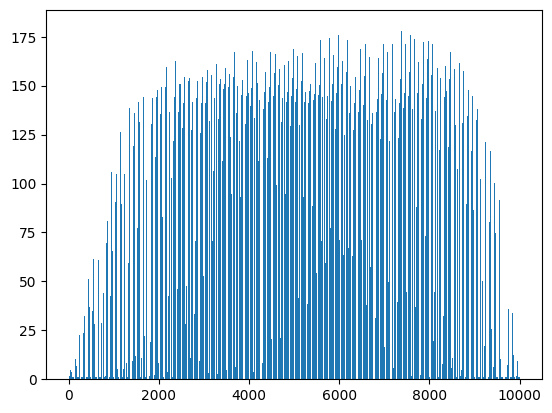

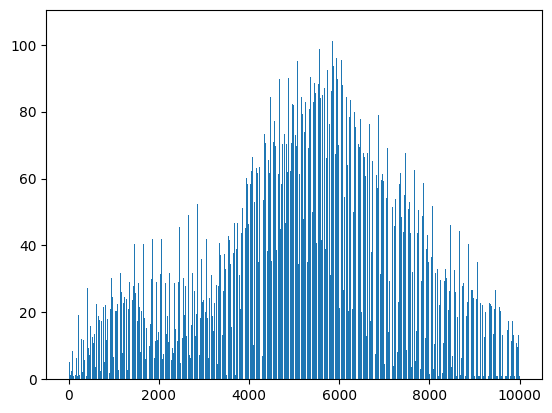

In [ ]:
x=range(10000)
plt.bar(x,m_a_im)
plt.show()
plt.bar(x,m_p_im)
plt.show()
plt.bar(x,m_b_im)
plt.show()

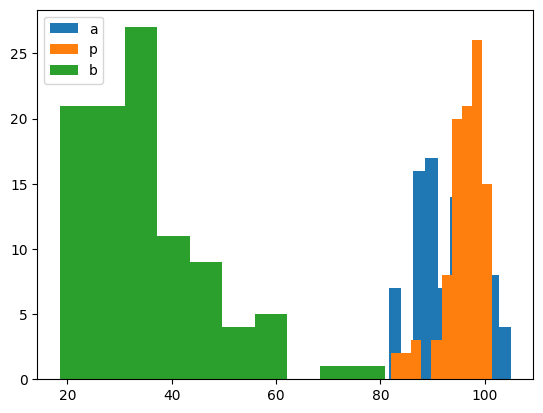

In [ ]:
plt.hist(im_m_a,label='a')
plt.hist(im_m_p,label='p')
plt.hist(im_m_b,label='b')
plt.legend()
plt.show()

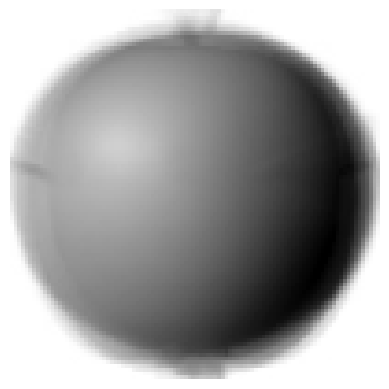

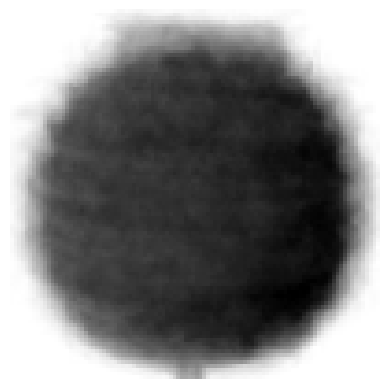

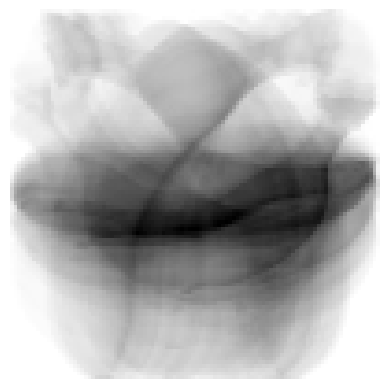

In [ ]:
for i in [m_a_im.reshape(100,100),m_p_im.reshape(100,100),m_b_im.reshape(100,100)]:
  plt.imshow(i,cmap='gray_r')
  plt.axis('off')
  plt.show()

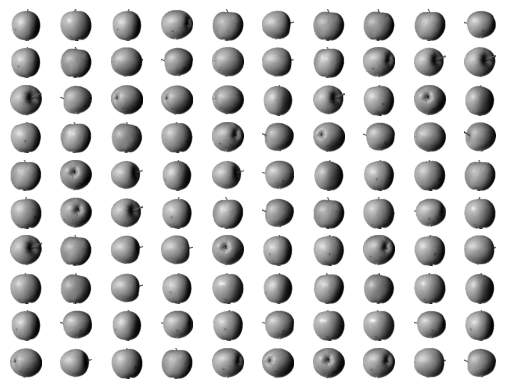

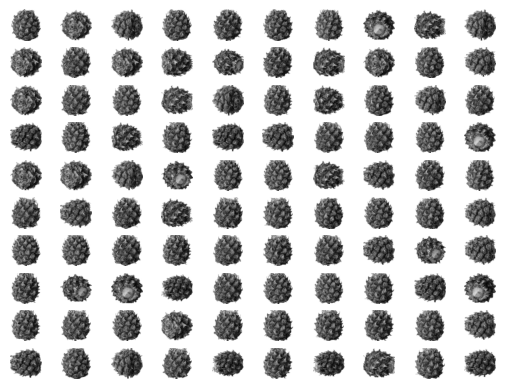

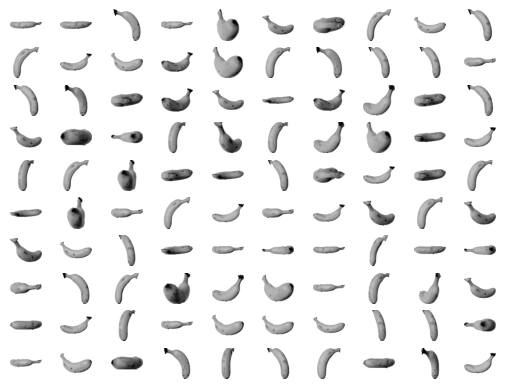

In [ ]:
for a_f in  [a,p,b]:
  f,ax=plt.subplots(10,10)
  for i in range(10):
    for j in range(10):
      ax[i,j].imshow(a_f[i*10+j],cmap='gray_r')
      ax[i,j].axis('off')
  plt.show()

In [ ]:
a_v

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
ck_a_im=m_a_im.reshape(100,100)
ck_p_im=m_p_im.reshape(100,100)
ck_b_im=m_b_im.reshape(100,100)
a_data=abs(X-ck_a_im)
a_data=a_data.mean(axis=(1,2))
p_data=abs(X-ck_p_im)
p_data=p_data.mean(axis=(1,2))
b_data=abs(X-ck_b_im)
b_data=b_data.mean(axis=(1,2))
a_data.shape

(300,)

In [ ]:
ai=a_data.argsort()[:100]
pi=p_data.argsort()[:100]
bi=b_data.argsort()[:100]

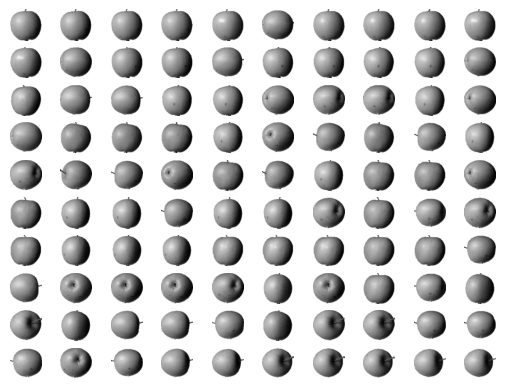

In [ ]:
f,ax=plt.subplots(10,10)
for i in range(10):
  for j in range(10):
    ax[i,j].imshow(X[ai[i*10+j]],cmap='gray_r')
    ax[i,j].axis('off')
plt.show()

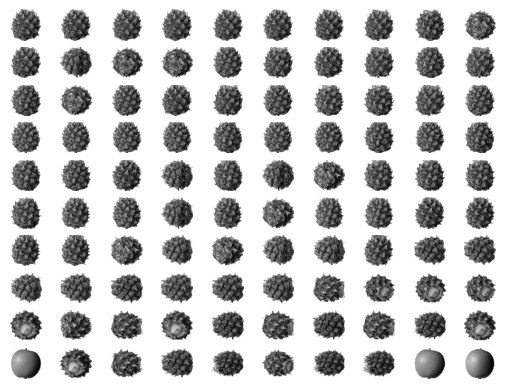

In [ ]:
f,ax=plt.subplots(10,10)
for i in range(10):
  for j in range(10):
    ax[i,j].imshow(X[pi[i*10+j]],cmap='gray_r')
    ax[i,j].axis('off')
plt.show()

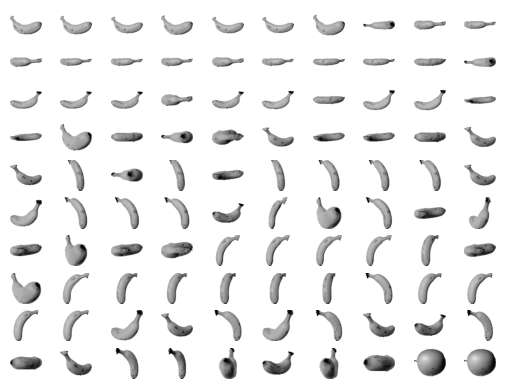

In [ ]:
f,ax=plt.subplots(10,10)
for i in range(10):
  for j in range(10):
    ax[i,j].imshow(X[bi[i*10+j]],cmap='gray_r')
    ax[i,j].axis('off')
plt.show()

In [ ]:
s_x=X.reshape(-1,10000)
s_x.shape

(300, 10000)

In [ ]:
from sklearn.cluster import KMeans
m=KMeans(3,random_state=20)
m.fit(s_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=20)

In [ ]:
np.unique(m.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 98,  91, 111]))

In [ ]:
l0=X[m.labels_==0]
l1=X[m.labels_==1]
l2=X[m.labels_==2]

In [ ]:
np.ceil(12/10)#올림

2.0

In [ ]:
def 출력함수(arr):
  n=len(arr)
  r=int(np.ceil(n/10))
  c=n if r<2 else 10
  f,ax = plt.subplots(r,c,squeeze=False)
  for i in range(r):
    for j in range(c):
      if i*10+j<n:
        ax[i,j].imshow(arr[i*10+j],cmap='gray_r')
      ax[i,j].axis('off')
  plt.show()

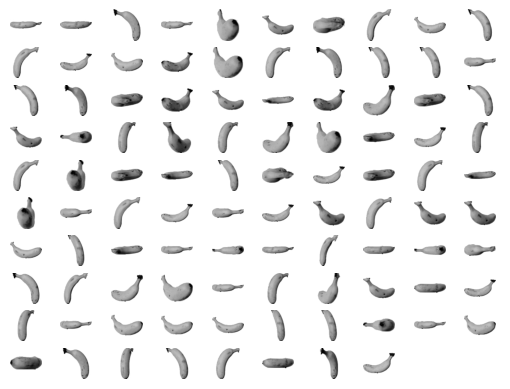

In [ ]:
출력함수(l0)

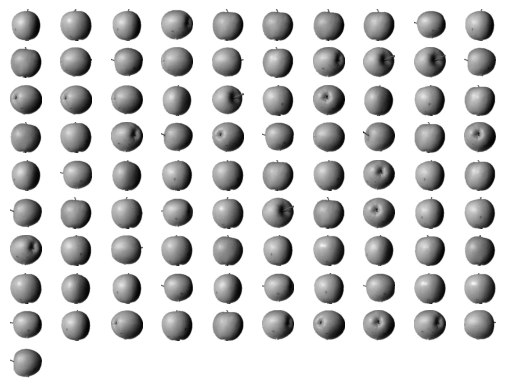

In [ ]:
출력함수(l1)

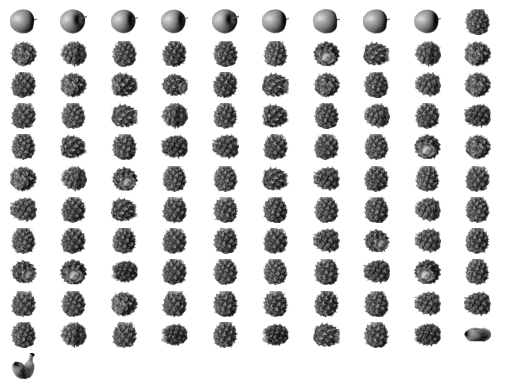

In [ ]:
출력함수(l2)

In [ ]:
out_c=m.cluster_centers_

In [ ]:
out_cs=out_c.reshape(-1,100,100)
out_cs.shape

(3, 100, 100)

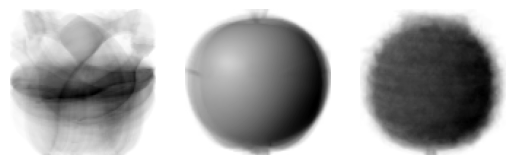

In [ ]:
출력함수(out_cs)

In [ ]:
m.transform(X[:1].reshape(-1,10000))

array([[8642.61845541, 3087.33092099, 4677.10527943]])

In [ ]:
m.predict(X[:1].reshape(-1,10000))

array([1], dtype=int32)

In [ ]:
m.inertia_

5074977316.088373

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

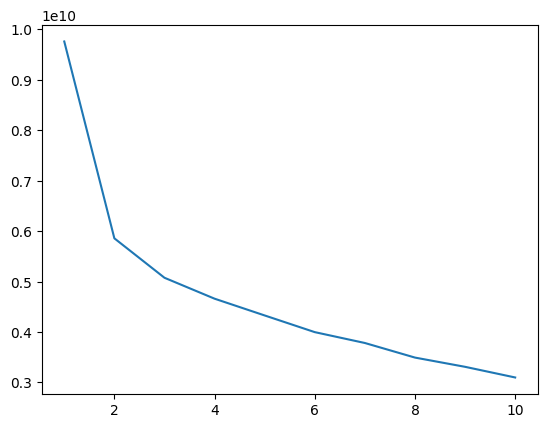

In [ ]:
ck_l=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,random_state=10)
  km.fit(s_x)
  ck_l.append(km.inertia_)
plt.plot(range(1,11),ck_l)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [ ]:
silhouette_samples(s_x,m.labels_)

In [ ]:
def c_s(k,x_f):
  km=KMeans(n_clusters=k,random_state=0)
  py=km.fit_predict(x_f)
  s_v=silhouette_samples(x_f,py)

  y_ax_lo=0
  y_ax_up=0
  y_t=[]

  for c in range(k):
    c_s_v=s_v[py==c]
    c_s_v.sort()
    y_ax_up += len(c_s_v)
    plt.barh(range(y_ax_lo,y_ax_up),c_s_v,height=1)
    y_t.append((y_ax_lo+y_ax_up)/2.)
    y_ax_lo += len(c_s_v)
  s_mean=np.mean(s_v)
  plt.axvline(s_mean,color='r',linestyle='--')
  plt.yticks(y_t,range(k))
  plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.title('K_Number : '+ str(k)+'\n' \
              + 'Silhouette Score : '+ str(round(s_mean,3)))
  plt.ylabel('Cluster')
  plt.xlabel('Silhouette coefficient')
  plt.tight_layout()
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


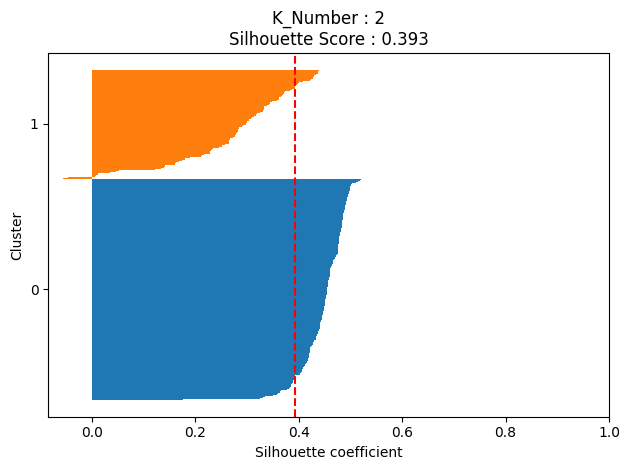

In [ ]:
c_s(2,s_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


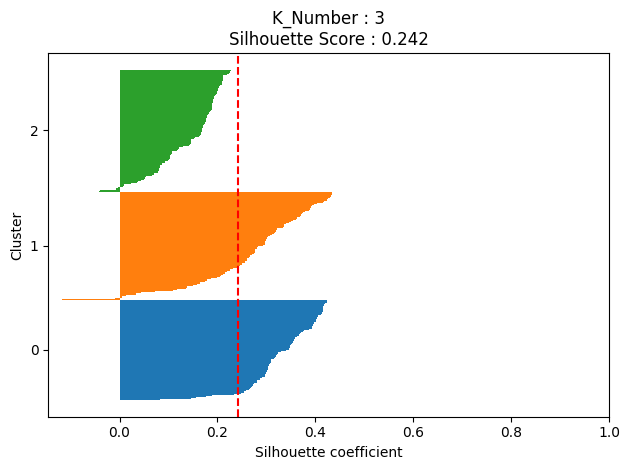

In [ ]:
c_s(3,s_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


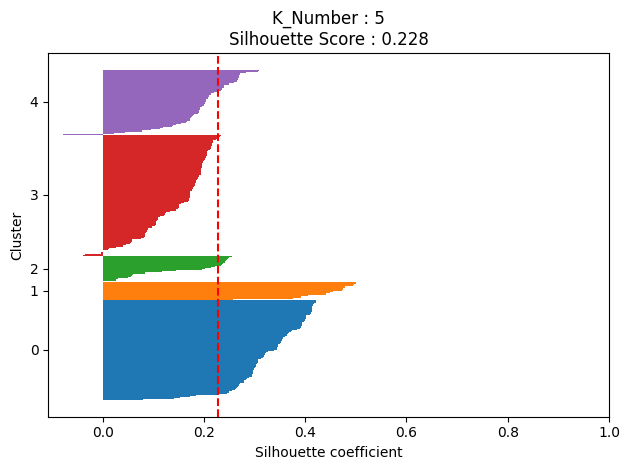

In [ ]:
c_s(5,s_x)